## Импорт библиотек

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from plotly.offline import init_notebook_mode, iplot
import plotly
import numpy as np
import plotly.graph_objs as go
from sklearn.metrics import r2_score


init_notebook_mode(connected=True)
%matplotlib inline

## Чтение данных 

In [2]:
minsk_citizens = pd.read_csv("MinskCitizens.csv",index_col='year').dropna(axis=1)
minsk_salaries = pd.read_csv("MinskSalaries.csv",index_col='year').dropna(axis=1)
minsk_in_and_out = pd.read_csv("MinskInAndOut.csv",index_col='year').dropna(axis=1)
minsk_workers = pd.read_csv("MinskWorkerCitizens.csv",index_col='year').dropna(axis=1)
minsk_df = pd.concat([minsk_citizens,minsk_salaries,minsk_in_and_out,minsk_workers],axis=1).dropna()
minsk_df.count_of_workers = minsk_df.count_of_workers.astype(int)
minsk_df.citizens = minsk_df.citizens.astype(int)
minsk_df.salary = minsk_df.salary.astype(float)
minsk_df['in'] = minsk_df['in'].astype(int)
minsk_df.out = minsk_df.out.astype(int)

In [3]:
minsk_district_citizens = pd.read_csv("MinskDistCitizens.csv",index_col='year').dropna(axis=1)
minsk_district_salaries = pd.read_csv("MinskDistSalaries.csv",index_col='year').dropna(axis=1)
minsk_district_in_and_out = pd.read_csv("MinskDistrictInAndOut.csv",index_col='year').dropna(axis=1)
minsk_district_workers = pd.read_csv("MinskDistWorkerCitizens.csv",index_col='year').dropna(axis=1)
minsk_district_df = pd.concat([minsk_district_citizens,minsk_district_salaries,minsk_district_in_and_out,minsk_district_workers],axis=1).dropna()
minsk_district_df.count_of_workers = minsk_district_df.count_of_workers.apply(lambda x: x.replace(',','')).astype(int)
minsk_district_df.citizens = minsk_district_df.citizens.astype(int)
minsk_district_df.salary = minsk_district_df.salary.astype(float)
minsk_district_df['in'] = minsk_district_df['in'].astype(int)
minsk_district_df.out = minsk_district_df.out.astype(int)

В качестве дополнительнных переменных были выбраны: средняя зарплата, население, количество работаспособного населения

## Данные города Минска

In [4]:
minsk_df

,citizens,salary,in,out,count_of_workers
year,,,,,
2013,1903287,636.7503,44663,29331,1094500
2014,1927950,773.1043,44419,33713,1089300
2015,1948281,887.2477,53220,37247,1080000
2016,1974857,985.8000,49469,39665,1065900
2017,1992738,1125.5000,50517,45180,1067600
2018,2001196,1329.6000,55048,44794,1066900
2019,2012896,1495.2000,62562,53305,1087700


In [5]:
minsk_df.describe()

,citizens,salary,in,out,count_of_workers
count,7.000000e+00,7.000000,7.000000,7.000000,7.000000e+00
mean,1.965886e+06,1033.314614,51414.000000,40462.142857,1.078843e+06
std,4.067341e+04,305.010145,6322.435659,8024.836373,1.204739e+04
min,1.903287e+06,636.750300,44419.000000,29331.000000,1.065900e+06
25%,1.938116e+06,830.176000,47066.000000,35480.000000,1.067250e+06
50%,1.974857e+06,985.800000,50517.000000,39665.000000,1.080000e+06
75%,1.996967e+06,1227.550000,54134.000000,44987.000000,1.088500e+06
max,2.012896e+06,1495.200000,62562.000000,53305.000000,1.094500e+06


## Коррелограмма начальных данных(включая целевую переменную)

<AxesSubplot:>

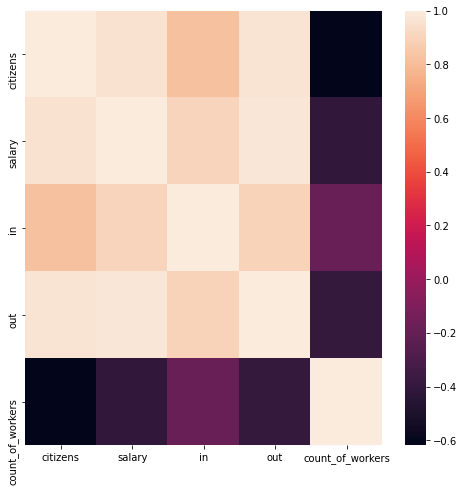

In [6]:
plt.figure(figsize=(8,8))
sns.heatmap(minsk_df.corr())

## Данные Минской Области


In [7]:
minsk_district_df

,citizens,salary,in,out,count_of_workers
year,,,,,
2013,1417004,496.1523,39989,36851,697616
2014,1421236,598.7224,46034,39312,697500
2015,1431088,666.7886,54279,43913,695298
2016,1446125,713.3000,47623,40609,691200
2017,1456101,812.9000,47428,40391,683700
2018,1463137,1079.6000,47497,40744,686253
2019,1469253,1242.3250,50079,40462,685201


In [8]:
minsk_district_df.describe()

,citizens,salary,in,out,count_of_workers
count,7.000000e+00,7.000000,7.000000,7.000000,7.000000
mean,1.443421e+06,801.398329,47561.285714,40326.000000,690966.857143
std,2.068108e+04,268.352552,4304.346436,2091.567355,5971.864322
min,1.417004e+06,496.152300,39989.000000,36851.000000,683700.000000
25%,1.426162e+06,632.755500,46731.000000,39851.500000,685727.000000
50%,1.446125e+06,713.300000,47497.000000,40462.000000,691200.000000
75%,1.459619e+06,946.250000,48851.000000,40676.500000,696399.000000
max,1.469253e+06,1242.325000,54279.000000,43913.000000,697616.000000


## Коррелограмма начальных данных(включая целевую переменную)

<AxesSubplot:>

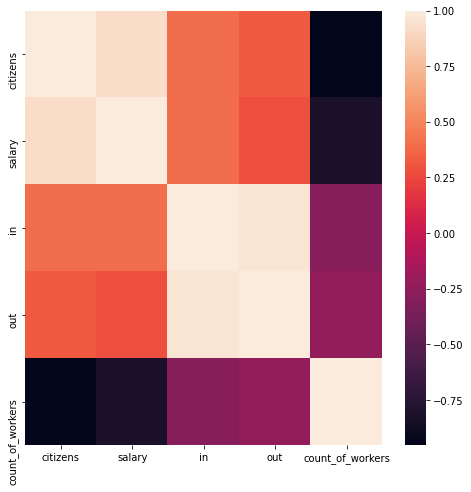

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(minsk_district_df.corr())

## График количества убывших из города Минска

<AxesSubplot:xlabel='year'>

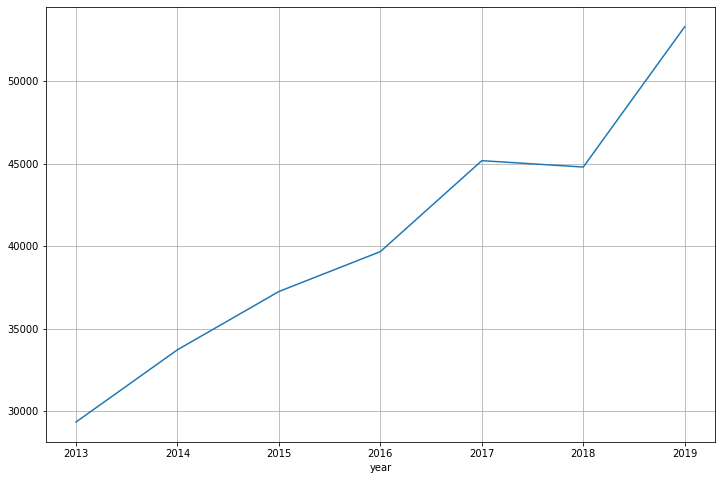

In [10]:
plt.figure(figsize=(12,8))
minsk_df.out.plot(grid=True)

## График количества прибывших в город Минск


<AxesSubplot:xlabel='year'>

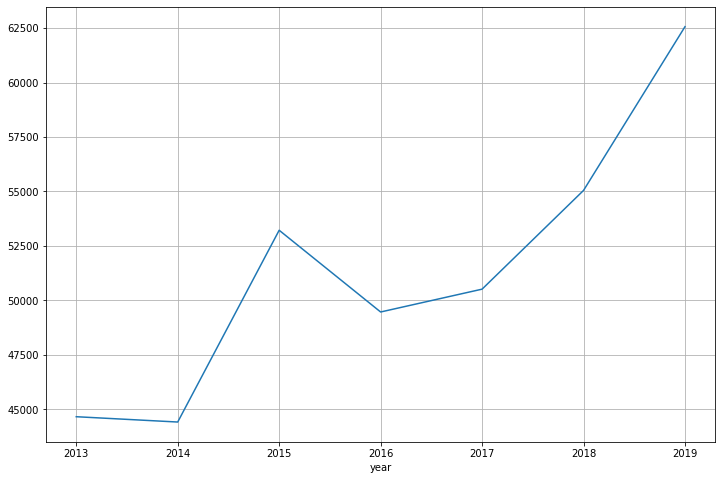

In [11]:
plt.figure(figsize=(12,8))
minsk_df['in'].plot(grid=True)

## График количества убывших из Минской Области

<AxesSubplot:xlabel='year'>

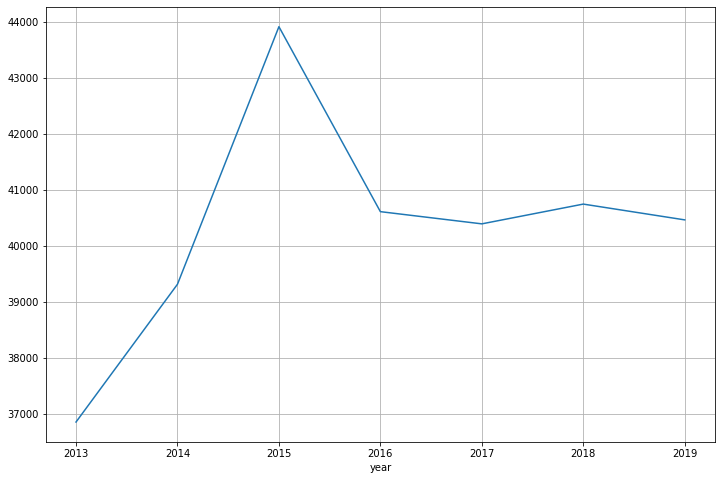

In [12]:
plt.figure(figsize=(12,8))
minsk_district_df.out.plot(grid=True)

## График количества прибывших в Минскую область


<AxesSubplot:xlabel='year'>

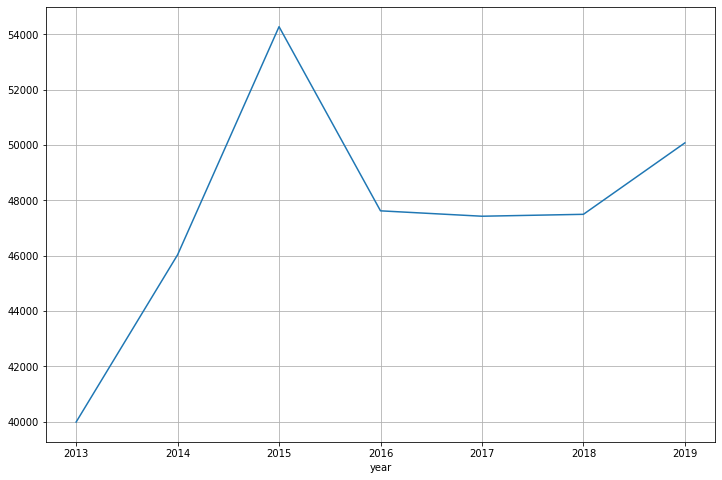

In [13]:
plt.figure(figsize=(12,8))
minsk_district_df['in'].plot(grid=True)

# Построим модели для города Минска

In [14]:
minsk_df

,citizens,salary,in,out,count_of_workers
year,,,,,
2013,1903287,636.7503,44663,29331,1094500
2014,1927950,773.1043,44419,33713,1089300
2015,1948281,887.2477,53220,37247,1080000
2016,1974857,985.8000,49469,39665,1065900
2017,1992738,1125.5000,50517,45180,1067600
2018,2001196,1329.6000,55048,44794,1066900
2019,2012896,1495.2000,62562,53305,1087700


## Пассивный прогноз: возьмем в качестве значений признаков среднее значение за предыдущие 5 лет(для года x среднее между x-1,x-2,...,x-5)

In [15]:
salary_for_preds = minsk_df.salary.to_list()
citizens_for_preds = minsk_df.citizens.to_list()
count_of_workers_for_preds = minsk_df.count_of_workers.to_list()

In [16]:
for _ in range(5):
    salary_for_preds.append(np.mean(salary_for_preds[-5:]))
    citizens_for_preds.append(np.mean(citizens_for_preds[-5:]).astype('int64'))
    count_of_workers_for_preds.append(np.mean(count_of_workers_for_preds[-5:]).astype('int64'))

In [17]:
salary_for_preds = salary_for_preds[-5:]
citizens_for_preds = citizens_for_preds[-5:]
count_of_workers_for_preds = count_of_workers_for_preds[-5:]

In [18]:
X_for_prediction_passive = pd.DataFrame({
    "citizens":citizens_for_preds,
    "salary":salary_for_preds,
    "count_of_workers":count_of_workers_for_preds,
    "year":[2020,2021,2022,2023,2024]
}).set_index('year')

## Оптимистичный прогноз: посчитаем признаки по следующей формуле - текущее значение = предыдущее значение*процент роста значения за последние 3 года

#### процент роста: x_t - значение в год t; тогда процент роста за последние три года = (x_t/x_t-1 + x_t/x_t-2 + 1)/3

In [19]:
salary_for_preds = minsk_df.salary.to_list()
citizens_for_preds = minsk_df.citizens.to_list()
count_of_workers_for_preds = minsk_df.count_of_workers.to_list()
for _ in range(5):
    salary_for_preds.append((salary_for_preds[-1]/salary_for_preds[-2]+
                             salary_for_preds[-1]/salary_for_preds[-3]+1)/3*salary_for_preds[-1])
    citizens_for_preds.append(int((citizens_for_preds[-1]/citizens_for_preds[-2]+
                             citizens_for_preds[-1]/citizens_for_preds[-3]+1)/3*citizens_for_preds[-1]))
    count_of_workers_for_preds.append(int((count_of_workers_for_preds[-1]/count_of_workers_for_preds[-2]+
                             count_of_workers_for_preds[-1]/count_of_workers_for_preds[-3]+1)/3*count_of_workers_for_preds[-1]))

salary_for_preds = salary_for_preds[-5:]
citizens_for_preds = citizens_for_preds[-5:]
count_of_workers_for_preds = count_of_workers_for_preds[-5:]


In [20]:
X_for_prediction_opt = pd.DataFrame({
    "citizens":citizens_for_preds,
    "salary":salary_for_preds,
    "count_of_workers":count_of_workers_for_preds,
    "year":[2020,2021,2022,2023,2024]
}).set_index('year')

In [21]:
X = minsk_df.drop(['in','out'],axis=1)


In [22]:
X.columns

Index(['citizens', 'salary', 'count_of_workers'], dtype='object')

## Регрессия для количества прибывших

### Обучим регрессию

In [23]:
y = minsk_df['in']


In [24]:
lin_reg = LinearRegression().fit(X,y)

In [25]:
print(f"Итоговая формула : y={round(lin_reg.coef_[0],4)}x1 + {round(lin_reg.coef_[1],4)}x2 + {round(lin_reg.coef_[2],4)}x3 +({lin_reg.intercept_})")
print("Где x1 - количество жителей, x2 - зарплата, x3 - количество трудоспособного населения")

Итоговая формула : y=0.0136x1 + 19.035x2 + 0.1254x3 +(-130194.87241525916)
Где x1 - количество жителей, x2 - зарплата, x3 - количество трудоспособного населения


### основываясь на итоговой формуле, можно сказать, что основным фактором влияния на количество прибывших в Минск является уровень средней зарплаты

In [26]:
preds_for_old = lin_reg.predict(X).astype("int64")

In [27]:
r2 = r2_score(preds_for_old,y.to_numpy())
adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-X.shape[1]-1)

print(f"r2 score of a regression is: {r2}")
print(f"Adjusted r2 score of a regression is: {adj_r2}")


r2 score of a regression is: 0.8337112326904359
Adjusted r2 score of a regression is: 0.6674224653808718


### даннные значения r2 указывают на то, что мы можем считать регрессию достоверной

### посмотрим как она описывает наши исходные данные

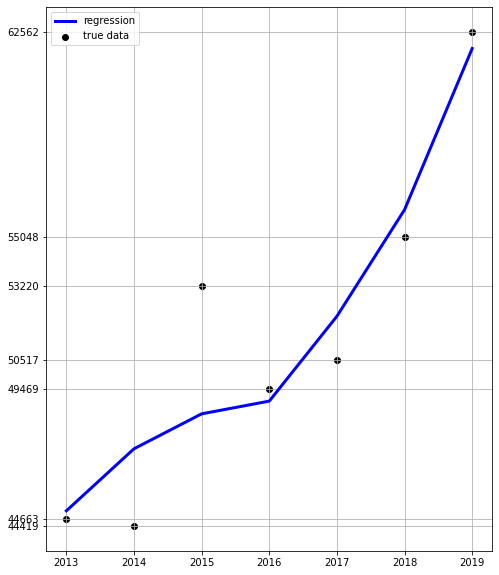

In [28]:
plt.figure(figsize=(8,10))
plt.scatter(X.index.to_list(), y.to_numpy(), color="black",label='true data')
plt.plot(X.index.to_list(), preds_for_old, color="blue", linewidth=3,label='regression')
plt.legend()
plt.xticks(X.index.to_list())
plt.yticks(y)
plt.grid()

plt.show()

### Не стоит пугаться непрямой линии, наша регрессия постороена на 3 переменных

### Сделаем предсказания: оптимистичные

In [31]:
predictions = lin_reg.predict(X_for_prediction_opt.astype("int64"))

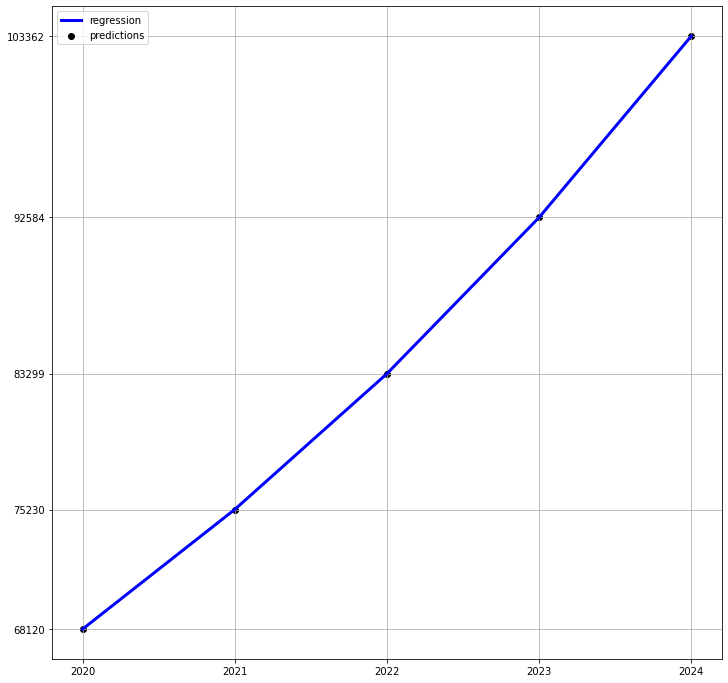

In [32]:
plt.figure(figsize=(12,12))
plt.scatter(X_for_prediction_opt.index.to_list(), predictions, color="black",label='predictions')
plt.plot(X_for_prediction_opt.index.to_list(), predictions, color="blue", linewidth=3,label='regression')
plt.legend()
plt.xticks(X_for_prediction_opt.index.to_list())
plt.yticks(predictions)
plt.grid()

plt.show()

In [34]:
# cохраним результат
results1 = pd.DataFrame({
    'year':X_for_prediction_opt.index.to_list(),
    'in': predictions
})
results1.to_csv("MinskInCitizensPredictionOpt.csv")

### Сделаем предсказания: пассивные

In [35]:
predictions = lin_reg.predict(X_for_prediction_passive.astype("int64"))

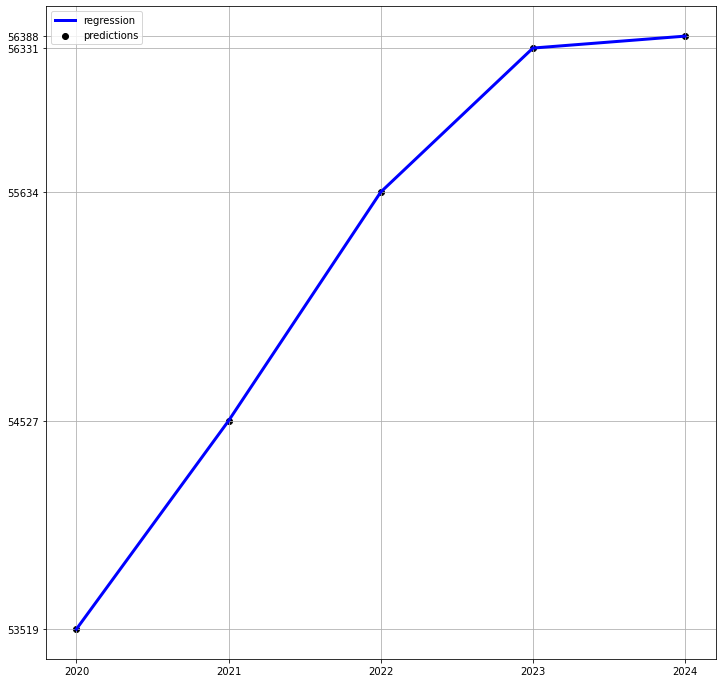

In [36]:
plt.figure(figsize=(12,12))
plt.scatter(X_for_prediction_passive.index.to_list(), predictions, color="black",label='predictions')
plt.plot(X_for_prediction_passive.index.to_list(), predictions, color="blue", linewidth=3,label='regression')
plt.legend()
plt.xticks(X_for_prediction_passive.index.to_list())
plt.yticks(predictions)
plt.grid()

plt.show()

In [37]:
# cохраним результат
results2= pd.DataFrame({
    'year':X_for_prediction_passive.index.to_list(),
    'in': predictions
})
results2.to_csv("MinskInCitizensPredictionPassive.csv")

## Проведем аналогичные действия для числа убывших из Минска

In [38]:
y = minsk_df['out']
lin_reg = LinearRegression().fit(X,y)

In [39]:
print(f"Итоговая формула : y={round(lin_reg.coef_[0],4)}x1 + ({round(lin_reg.coef_[1],4)}x2) + {round(lin_reg.coef_[2],4)}x3 +({lin_reg.intercept_})")
print("Где x1 - количество жителей, x2 - зарплата, x3 - количество трудоспособного населения")

Итоговая формула : y=0.3466x1 + (-13.5561x2) + 0.3217x3 +(-974031.4022996799)
Где x1 - количество жителей, x2 - зарплата, x3 - количество трудоспособного населения


In [40]:
preds_for_old = lin_reg.predict(X).astype("int64")

In [41]:
r2 = r2_score(preds_for_old,y.to_numpy())
adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-X.shape[1]-1)

print(f"r2 score of a regression is: {r2}")
print(f"Adjusted r2 score of a regression is: {adj_r2}")


r2 score of a regression is: 0.9979741986164019
Adjusted r2 score of a regression is: 0.9959483972328038


### даннные значения r2 указывают на то, что мы можем считать регрессию достоверной


### посмотрим как она описывает наши исходные данные

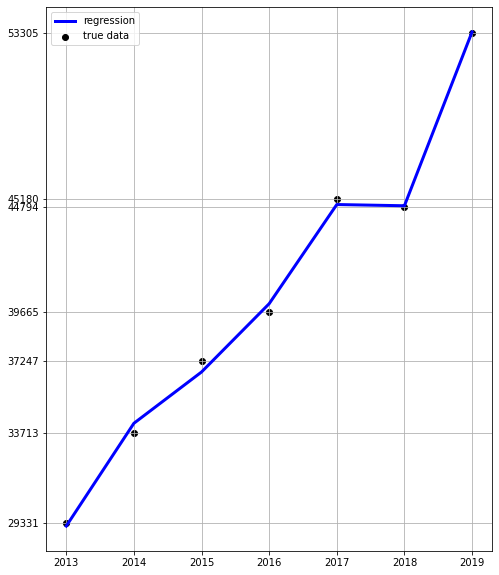

In [42]:
plt.figure(figsize=(8,10))
plt.scatter(X.index.to_list(), y.to_numpy(), color="black",label='true data')
plt.plot(X.index.to_list(), preds_for_old, color="blue", linewidth=3,label='regression')
plt.legend()
plt.xticks(X.index.to_list())
plt.yticks(y)
plt.grid()

plt.show()

### Сделаем предсказания: оптимистичные

In [43]:
predictions = lin_reg.predict(X_for_prediction_opt).astype("int64")

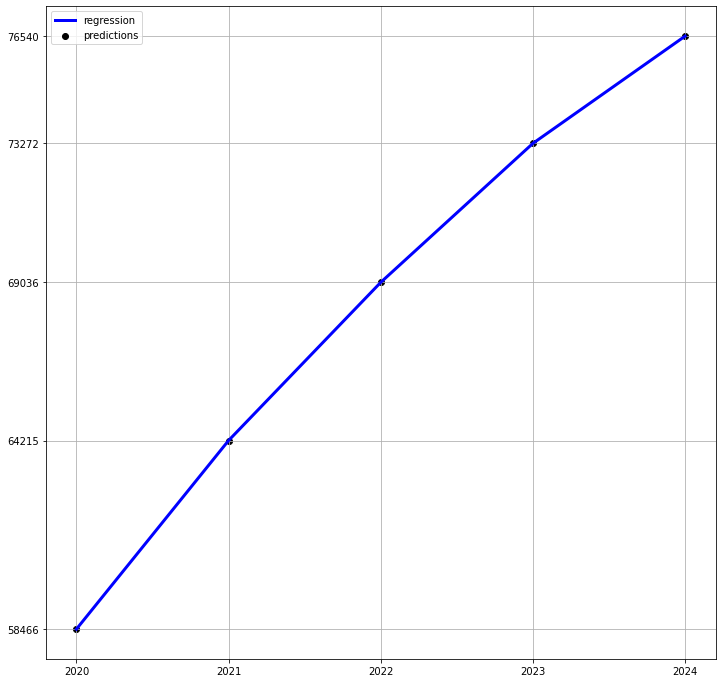

In [44]:
plt.figure(figsize=(12,12))
plt.scatter(X_for_prediction_opt.index.to_list(), predictions, color="black",label='predictions')
plt.plot(X_for_prediction_opt.index.to_list(), predictions, color="blue", linewidth=3,label='regression')
plt.legend()
plt.xticks(X_for_prediction_opt.index.to_list())
plt.yticks(predictions)
plt.grid()

plt.show()

In [45]:
# cохраним результат
results2 = pd.DataFrame({
    'year':X_for_prediction_opt.index.to_list(),
    'in': predictions
})
results2.to_csv("MinskOutCitizensPredictionOpt.csv")

### Сделаем предсказания: пассивные

In [46]:
predictions = lin_reg.predict(X_for_prediction_passive).astype("int64")

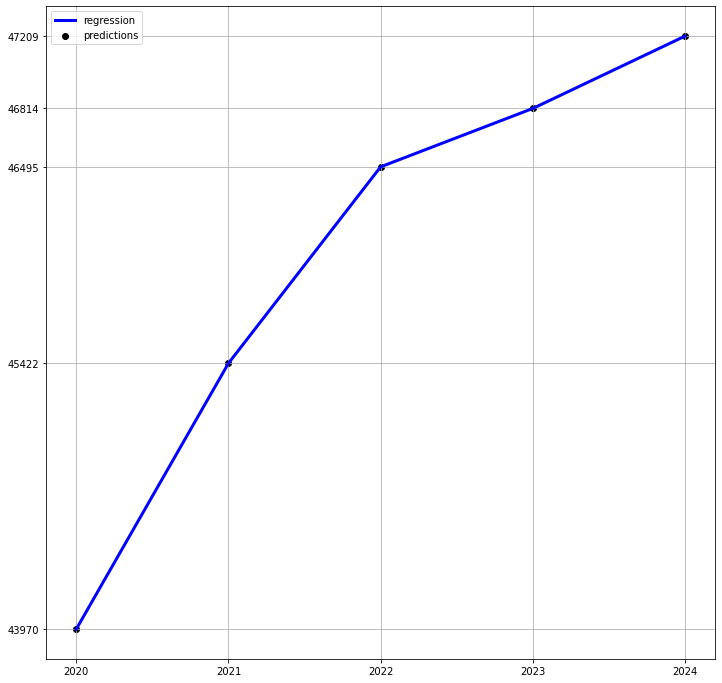

In [47]:
plt.figure(figsize=(12,12))
plt.scatter(X_for_prediction_opt.index.to_list(), predictions, color="black",label='predictions')
plt.plot(X_for_prediction_opt.index.to_list(), predictions, color="blue", linewidth=3,label='regression')
plt.legend()
plt.xticks(X_for_prediction_opt.index.to_list())
plt.yticks(predictions)
plt.grid()

plt.show()

In [48]:
# cохраним результат
results2 = pd.DataFrame({
    'year':X_for_prediction_passive.index.to_list(),
    'in': predictions
})
results2.to_csv("MinskOutCitizensPredictionPassive.csv")